In [1]:
from deep_Q_learning import train, self_train
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import pickle

In [3]:
train = True

## Question 11 
Plot average reward and average training loss for every 250 games during training. Does the loss decrease? Does the agent learn to play Tic Tac Toe?

In [101]:
train11 = False 
if train or train11:
    eps_agent_to_results
    for eps_agent in range(10):
        eps_agent = eps_agent/10
        _, losses, rewards, Mrands_fix, Mopts_fix = train(eps_agent=eps_agent, nb_epochs=20000)
        eps_agent_to_results[eps_agent] = (losses, rewards, Mrands_fix, Mopts_fix)

In [4]:
eps_agent_to_results
for eps_agent in range(10):
    eps_agent = eps_agent/10
    _, losses, rewards, Mrands_fix, Mopts_fix = train(eps_agent=eps_agent, nb_epochs=20000)
    eps_agent_to_results[eps_agent] = (losses, rewards, Mrands_fix, Mopts_fix)

100%|█████████████████████████████████████| 20000/20000 [09:18<00:00, 35.78it/s]

Learning finished after 558.92s
Played a total of 20000 games


NameError: name 'eps_agent_to_results' is not defined

In [ ]:
fig, axs = plt.subplots(2, figsize=(6,9))
for eps in [0,0.3,0.6,0.9]:
    axs[0].plot(eps_agent_to_results[eps][1], label=r"$\epsilon$=" + '{:.1f}'.format(eps))
    axs[1].plot(eps_agent_to_results[eps][0], label=r"$\epsilon$=" + '{:.1f}'.format(eps))
    
axs[0].set_xlabel('Epoch / 250')
axs[1].set_xlabel('Epoch / 250')
axs[0].set_ylabel('Average Reward')
axs[1].set_ylabel('Training Loss')

plt.suptitle('Q11. Learning from experts')

plt.legend()
plt.savefig('q11.png')

plt.show()

In [ ]:
with open('q11.pkl','wb') as f:
    pickle.dump(eps_agent_to_results, f)

The loss first increases then decreases. Agent can learn to play since the rewards increase over time

# Question 12
Repeat the training but without the replay buffer and with a batch size of 1: At every step, update the network by using only the latest transition. What do you observe?

In [33]:
_, losses, rewards, _, _ = train(eps_agent=0.1, buffer_size=1, batch_size=1, nb_epochs=20000)

100%|█████████████████████████████████████| 20000/20000 [08:47<00:00, 37.93it/s]

Learning finished after 527.29s
Played a total of 20000 games


In [114]:
# with open('q12.pkl','wb') as f:
#     pickle.dump((losses, rewards), f)
losses, rewards = pickle.load(open('q12.pkl','rb'))

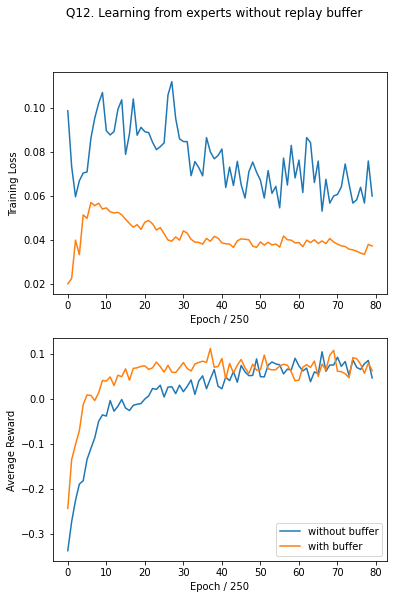

In [116]:
fig, axs = plt.subplots(2,figsize=(6,9))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(losses, label="without buffer")
axs[0].plot(eps_agent_to_results[0.1][0], label="with buffer")
axs[0].set_xlabel('Epoch / 250')
axs[0].set_ylabel('Training Loss')

axs[1].plot(rewards, label="without buffer")
axs[1].plot(eps_agent_to_results[0.1][1], label="with buffer")
axs[1].set_xlabel('Epoch / 250')
axs[1].set_ylabel('Average Reward')

plt.suptitle('Q12. Learning from experts without replay buffer')

plt.legend()
plt.savefig('q12.png')

plt.show()

In [38]:
with open('q12.pkl','wb') as f:
    pickle.dump((losses, rewards), f)

The loss is more fluctuated and the rewards are smaller

Instead of fixing eps, use eps(n) in Equation 1. For different values of n\*,  run your DQN against Opt(0.5) for 20000 games – switch the 1st player after every game. Choose several values of n* from a reasonably wide interval between 1 to 40’000 – particularly, include n* = 1

## Question 13 
After every 250 games during training, compute the ‘test’ Mopt and Mrand for your agents. Plot Mopt and Mrand over time. Does decreasing eps help training compared to having a fixed ? What is the effect of n* ?

In [117]:
# with open('q13.pkl','wb') as f:
#     pickle.dump(n_star_to_results, f)
n_star_to_results = pickle.load(open('q13.pkl','rb'))

In [39]:
n_star_to_results={}
for max_epoch in [1, 10, 100, 1000, 5000, 10000, 20000, 40000, 100000]:
    _, _, _, Mrand, Mopt = train(decay_eps=True, max_epoch= max_epoch, nb_epochs=20000)
    n_star_to_results[max_epoch] = (Mrand, Mopt)


100%|█████████████████████████████████████| 20000/20000 [09:25<00:00, 35.34it/s]


Learning finished after 565.90s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [09:10<00:00, 36.33it/s]


Learning finished after 550.47s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [09:20<00:00, 35.67it/s]


Learning finished after 560.65s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [09:22<00:00, 35.54it/s]


Learning finished after 562.68s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [09:12<00:00, 36.23it/s]


Learning finished after 552.10s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [09:02<00:00, 36.90it/s]


Learning finished after 542.02s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [08:52<00:00, 37.56it/s]


Learning finished after 532.42s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [08:33<00:00, 38.94it/s]


Learning finished after 513.62s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [08:10<00:00, 40.78it/s]

Learning finished after 490.44s
Played a total of 20000 games


In [41]:
with open('q13.pkl','wb') as f:
    pickle.dump(n_star_to_results, f)

In [119]:
colors = ['tab:'+i for i in ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']]

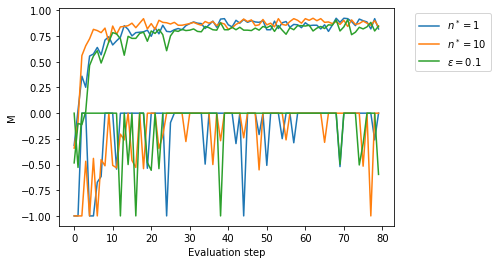

In [123]:
for i, n in enumerate([1,10]):
    plt.plot( n_star_to_results[n][0], label=r'$n^* = $'+str(n), color=colors[i])
    plt.plot( n_star_to_results[n][1], color=colors[i])
#     plt.plot( n_star_to_results[n][0], label="Mrand_"+str(n), color=colors[i])
#     plt.plot( n_star_to_results[n][1], color=colors[i])
    
plt.plot( eps_agent_to_results[0.1][2], label=r'$\epsilon = 0.1$', color=colors[i+1])
plt.plot( eps_agent_to_results[0.1][3], color=colors[i+1])
# plt.plot( eps_agent_to_results[0.1][2], label="Mrand_eps_fix", color=colors[i+1])
# plt.plot( eps_agent_to_results[0.1][3], color=colors[i+1])
plt.ylabel('M')
plt.xlabel('Evaluation step')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Choose the best value of n* that you found. Run DQN against Opt(eps_opt) for different values of eps_opt for 20000 games – switch the 1st player after every game. Choose several values of eps_opt from a reasonably wide interval between 0 to 1 – particularly, include eps_opt = 0.
## Question 14
After every 250 games during training, compute the ‘test’ Mopt and Mrand for your agents for each value of eps_opt. Plot Mopt and Mrand over time. What do you observe? How can you explain it?

In [83]:
best_max_epoch=10

In [84]:
eps_opt_to_metrics= {}
for eps_opt in range(10):
    eps_opt = eps_opt/10
    _, _, _, Mrand, Mopt = train(eps_opt=eps_opt, decay_eps=True, max_epoch= best_max_epoch, nb_epochs=20000)
    eps_opt_to_metrics[eps_opt] = (Mrand, Mopt)

100%|█████████████████████████████████████| 20000/20000 [22:24<00:00, 14.88it/s]


Learning finished after 1344.11s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [21:57<00:00, 15.18it/s]


Learning finished after 1317.37s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [18:28<00:00, 18.04it/s]


Learning finished after 1108.96s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [12:41<00:00, 26.25it/s]


Learning finished after 761.89s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [09:18<00:00, 35.78it/s]


Learning finished after 558.91s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [08:55<00:00, 37.33it/s]


Learning finished after 535.73s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [08:45<00:00, 38.09it/s]


Learning finished after 525.11s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [08:21<00:00, 39.88it/s]


Learning finished after 501.45s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [08:09<00:00, 40.87it/s]

Learning finished after 489.34s
Played a total of 20000 games


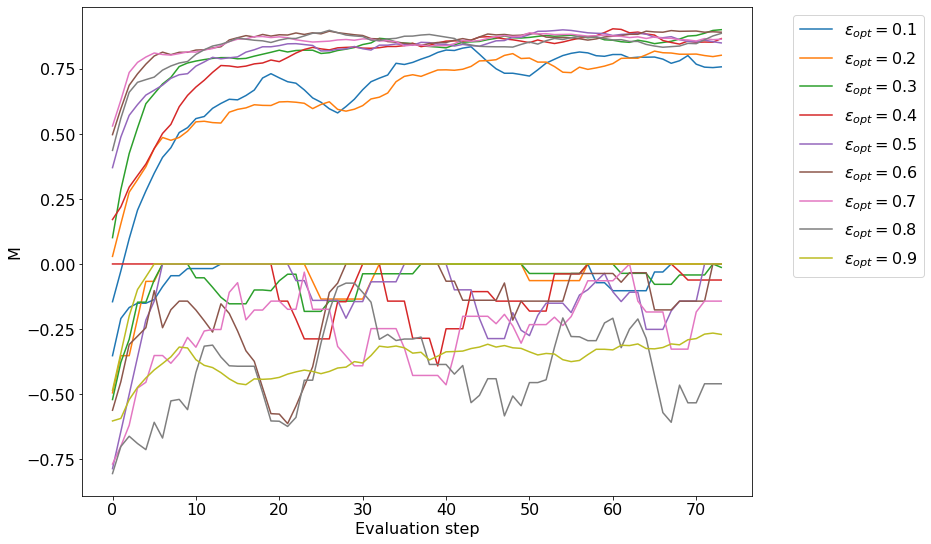

In [161]:
plt.figure(figsize=(12,9))
for i, eps in enumerate(eps_opt_to_metrics):
#     if eps not in [0.1, 0.2,0.8,0.9]: continue
    plt.plot( moving_average(eps_opt_to_metrics[eps][0], 7, 3), label=r'$\epsilon_{opt} = $'+str(eps), color=colors[i])
    plt.plot( moving_average(eps_opt_to_metrics[eps][1], 7, 3), color=colors[i])
#     plt.plot( n_star_to_results[n][0], label="Mrand_"+str(n), color=colors[i])
#     plt.plot( n_star_to_results[n][1], color=colors[i])
    

plt.ylabel('M')
plt.xlabel('Evaluation step')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [157]:
with open('q14.pkl','wb') as f:
    pickle.dump(eps_opt_to_metrics, f)

## Question 15
What are the highest values of Mopt and Mrand that you could achieve after playing 20000 games?

In [169]:
max(((k,v[0][-1]) for k,v in eps_opt_to_metrics.items()), key=lambda x: x[1]) # Mrand

(0.8, 0.908)

In [170]:
max(((k,v[1][-1]) for k,v in eps_opt_to_metrics.items()), key=lambda x: x[1]) #Mopt

(0.1, 0.0)

In [173]:
max(((k,v[0][-1]) for k,v in n_star_to_results.items()), key=lambda x: x[1]) # Mrand

(10000, 0.892)

In [174]:
max(((k,v[1][-1]) for k,v in n_star_to_results.items()), key=lambda x: x[1]) # Mrand

(1, 0.0)

In [ ]:
eps_agent_to_results

In [175]:
max(((k,v[2][-1]) for k,v in eps_agent_to_results.items()), key=lambda x: x[1]) # Mrand

(0.4, 0.852)

In [167]:
max(((k,max(v[3])) for k,v in eps_agent_to_results.items()), key=lambda x: x[1]) # Mrand

(0.1, 0.0)

## Question 16
After every 250 games during training, compute the ‘test’ Mopt and Mrand for different values of eps ∈\[0, 1). Plot Mopt and Mrand over time. Does the agent learn to play Tic Tac Toe? What is the effect of eps?

In [5]:
from deep_Q_learning import train, self_train


In [177]:
self_eps_agent_to_metrics= {}
for eps_agent in range(10):
    eps_agent = eps_agent/10
    _,losses, rewards, Mrand, Mopt = self_train(eps_agent=eps_agent, decay_eps=False, nb_epochs=20000)
    self_eps_agent_to_metrics[eps_agent] = (losses, rewards, Mrand, Mopt)


  6%|██                                    | 1105/20000 [00:32<07:50, 40.15it/s]Exception ignored in: <function tqdm.__del__ at 0x7f30d7ca70d0>
Traceback (most recent call last):
  File "/home/dunght/anaconda3/envs/transformers/lib/python3.9/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/home/dunght/anaconda3/envs/transformers/lib/python3.9/site-packages/tqdm/notebook.py", line 286, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'

  6%|██▎                                   | 1206/20000 [00:35<07:25, 42.15it/s]


 11%|████                                  | 2159/20000 [01:09<05:46, 51.51it/s]


 16%|██████▏                               | 3247/20000 [01:44<06:38, 42.02it/s]


 21%|████████                              | 4266/20000 [02:23<24:14, 10.82it/s]


 26%|█████████▉                            | 5210/20000 [02:58<05:40, 43.46it/s]


 31%|███████████▉                          | 6288/20000 [03:38<09:47, 23.33it/s]


 36%|█████████████▋                        | 7176/20000 [04:10<04:26, 48.14it/s]


 40%|███████████████▏                      | 7973/20000 [04:43<06:59, 28.64it/s]


 45%|█████████████████                     | 8956/20000 [05:15<04:20, 42.34it/s]


 51%|██████████████████▉                  | 10205/20000 [05:51<03:02, 53.65it/s]


 58%|█████████████████████▎               | 11510/20000 [06:29<14:43,  9.61it/s]


 62%|███████████████████████              | 12467/20000 [07:03<02:23, 52.34it/s]


 68%|█████████████████████████            | 13538/20000 [07:41<03:59, 27.03it/s]


 73%|███████████████████████████▏         | 14675/20000 [08:17<01:48, 48.97it/s]


 79%|█████████████████████████████▏       | 15807/20000 [08:55<01:56, 35.88it/s]


 84%|███████████████████████████████▏     | 16859/20000 [09:30<01:10, 44.55it/s]


 90%|█████████████████████████████████▏   | 17932/20000 [10:04<00:41, 49.65it/s]


 95%|███████████████████████████████████▏ | 18987/20000 [10:39<00:21, 47.20it/s]


100%|████████████████████████████████████▉| 19975/20000 [11:15<00:00, 44.51it/s]


100%|█████████████████████████████████████| 20000/20000 [11:19<00:00, 29.44it/s]


Learning finished after 679.45s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [12:35<00:00, 26.48it/s]


Learning finished after 755.17s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [11:45<00:00, 28.33it/s]


Learning finished after 705.91s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [11:03<00:00, 30.14it/s]


Learning finished after 663.47s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [08:13<00:00, 40.55it/s]


Learning finished after 493.22s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [07:27<00:00, 44.71it/s]


Learning finished after 447.33s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [07:09<00:00, 46.51it/s]


Learning finished after 429.98s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [06:58<00:00, 47.84it/s]


Learning finished after 418.07s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [06:48<00:00, 48.97it/s]


Learning finished after 408.40s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [06:35<00:00, 50.62it/s]

Learning finished after 395.14s
Played a total of 20000 games


In [178]:
with open('q15.pkl','wb') as f:
    pickle.dump(self_eps_agent_to_metrics, f)

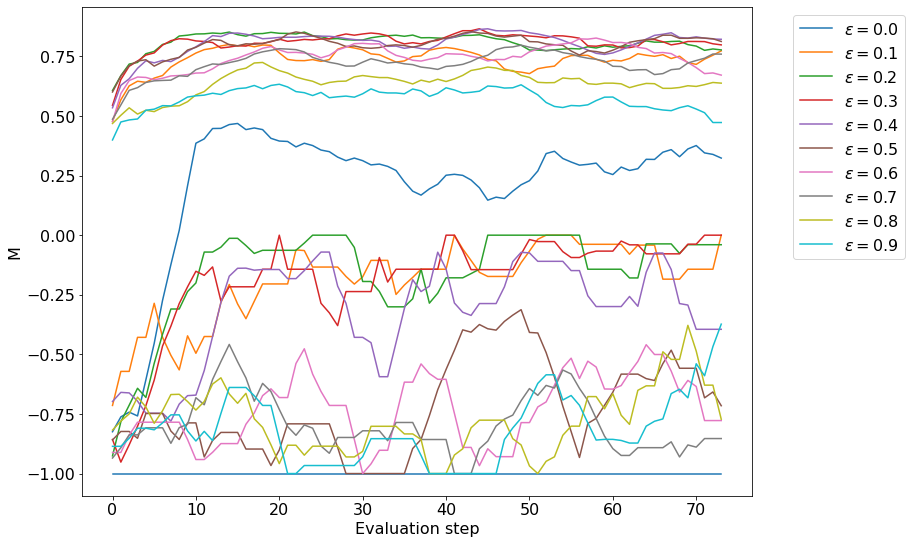

In [184]:
plt.figure(figsize=(12,9))
for i, eps in enumerate(self_eps_agent_to_metrics):
#     if eps not in [0.0, 0.1, 0.2,0.8,0.9]: continue
    plt.plot( moving_average(self_eps_agent_to_metrics[eps][2], 7, 3), label=r'$\epsilon = $'+str(eps), color=colors[i])
    plt.plot( moving_average(self_eps_agent_to_metrics[eps][3], 7, 3), color=colors[i])
#     plt.plot( self_eps_agent_to_metrics[n][eps][0], label="Mrand_"+str(n), color=colors[i])
#     plt.plot( self_eps_agent_to_metrics[n][eps][1], color=colors[i])
    

plt.ylabel('M')
plt.xlabel('Evaluation step')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

if eps is large, it's harder for the agent to learn

Instead of fixing eps, use eps(n) in Equation 1 with different values of n*

## Question 17
After every 250 games during training, compute the 'test' Mopt and Mrand for your agents. Plot Mopt and Mrand over time. Does decreasing eps help training compared to having a fixed eps? What is the effect of n*?

In [186]:
self_n_star_to_metrics= {}
eps_opt = 0.5
for n_star in [1, 10, 100, 1000, 5000, 10000, 20000, 40000, 100000]:
    _,losses, rewards, Mrand, Mopt = self_train(decay_eps=True, max_epoch= n_star, nb_epochs=20000)
    self_n_star_to_metrics[n_star] = (losses, rewards, Mrand, Mopt)

100%|█████████████████████████████████████| 20000/20000 [12:20<00:00, 27.01it/s]


Learning finished after 740.42s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [12:10<00:00, 27.37it/s]


Learning finished after 730.69s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [12:19<00:00, 27.03it/s]


Learning finished after 739.95s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [12:34<00:00, 26.49it/s]


Learning finished after 754.96s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [11:55<00:00, 27.94it/s]


Learning finished after 715.88s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [11:13<00:00, 29.69it/s]


Learning finished after 673.64s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [10:24<00:00, 32.00it/s]


Learning finished after 624.99s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [09:23<00:00, 35.48it/s]


Learning finished after 563.64s
Played a total of 20000 games


100%|█████████████████████████████████████| 20000/20000 [09:02<00:00, 36.86it/s]

Learning finished after 542.63s
Played a total of 20000 games


In [187]:
with open('q17.pkl','wb') as f:
    pickle.dump(self_n_star_to_metrics, f)

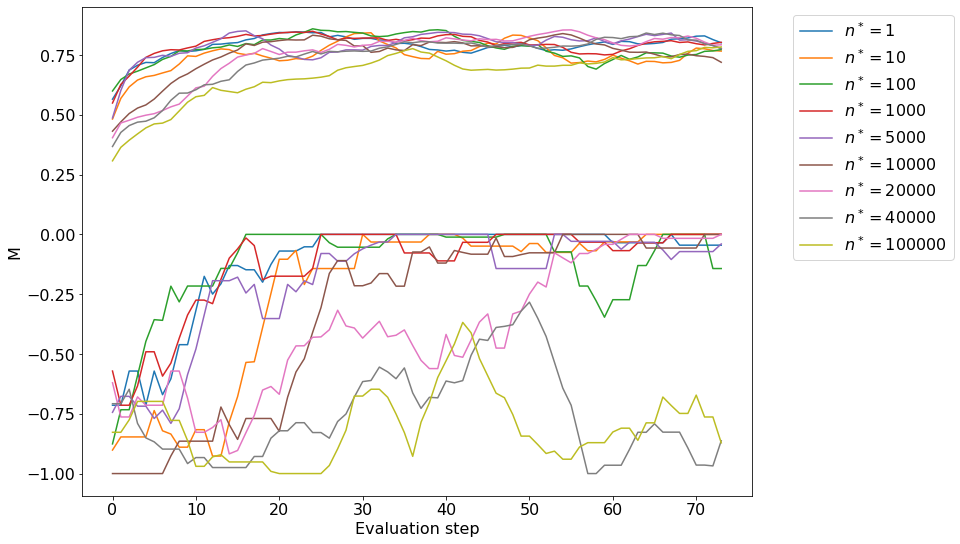

In [189]:
plt.figure(figsize=(12,9))
for i, n in enumerate(self_n_star_to_metrics):
#     if eps not in [0.0, 0.1, 0.2,0.8,0.9]: continue
    plt.plot( moving_average(self_n_star_to_metrics[n][2], 7, 3), label=r'$n^* = $'+str(n), color=colors[i])
    plt.plot( moving_average(self_n_star_to_metrics[n][3], 7, 3), color=colors[i])
#     plt.plot( self_eps_agent_to_metrics[n][eps][0], label="Mrand_"+str(n), color=colors[i])
#     plt.plot( self_eps_agent_to_metrics[n][eps][1], color=colors[i])
    

plt.ylabel('M')
plt.xlabel('Evaluation step')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Question 18
What are the highest values of Mopt and Mrand that you could achieve after playing 20000 games?

In [192]:
max(((k,v[2][-1]) for k,v in self_n_star_to_metrics.items()), key=lambda x: x[1]) # Mrand

(1000, 0.816)

In [193]:
max(((k,v[3][-1]) for k,v in self_n_star_to_metrics.items()), key=lambda x: x[1]) # Mrand

(1, 0.0)

In [ ]:
max(((k,v[3][-1]) for k,v in self_n_star_to_metrics.items()), key=lambda x: x[1]) # Mrand

In [ ]:
max(((k,v[4][-1]) for k,v in self_n_star_to_metrics.items()), key=lambda x: x[1]) # Mrand

## Question 19
For three board arrangements (i.e. states s), visualize Q-values of available actions (e.g. using heat maps). Does the result make sense? Did the agent learn the game well?

In [7]:
import torch
from deep_Q_learning import grid_to_state_tensor
import seaborn as sns


In [17]:
def estimate(policy_net, grid):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    nX = len(np.where(grid==1))
    nO = len(np.where(grid==-1))
    assert nX >= nO, "invalid state"
    
    if nX == nO:
        player = 'X'
    else:
        player = 'O'
        
    state = grid_to_state_tensor(grid, player, device)
    return policy_net(state).reshape(3,3).detach().cpu().numpy()

In [63]:
policy_net,_,_,_,_ = self_train(decay_eps=True, max_epoch=1000, nb_epochs=20000, eval_every=-1)

100%|█████████████████████████████████████| 20000/20000 [07:09<00:00, 46.58it/s]

Learning finished after 429.39s
Played a total of 20000 games


In [70]:
import torch
torch.save(policy_net,'q19.pt')

In [91]:
grid1 = np.array([[0,0,0],
                [0,0,0],
                [0,0,0]])
grid2 = np.array([[1,0,0],
                [0,0,0],
                [0,0,0]])
grid3 = np.array([[-1,-1,0],
                [0,1,0],
                [1,-1,1]])


In [93]:
def render_grid_with_q_values(grid, q_values):
    """
    Returns a string representing the rendered grid

    Params:
        - grid: Game state to be rendered

    Returns:
        A string containing the rendered game state
    """
    value2player = {0: '--', 1: 'X', -1: 'O'}
    rendered_grid = ''
    for i in range(3):
        rendered_grid += '|'
        separator = '    <->    ' if i == 1 else '              '
        for j in range(6):
            if j < 3:
                # Render grid
                rendered_grid += value2player[int(grid[i,j])] 
                if j < 2:
                    rendered_grid += ' '
            else:
                # Render q-values
                i_q = i - 3
                j_q = j - 3
                q_val = '{:.2f}'.format(q_values[i_q, j_q]) if q_values[i_q, j_q] < 0 else ' {:.2f}'.format(q_values[i_q, j_q])
                if j == 3:
                    rendered_grid += '|' + separator + '|' + q_val
                else:
                    rendered_grid += ' ' + q_val
        rendered_grid += '|'
        if i < 2:
            rendered_grid += '\n'

    return rendered_grid

In [96]:
def plot_grids_heatmap(policy_net, grids, path='./q19'):  
    """
    Plots and saves 
    """
    fig = plt.figure(figsize=(20, 5))
    axes = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)]

    for idx, grid in enumerate(grids):
        state = tuple(grid.flatten())
        if sum(state) < 0:
            raise ValueError('An invalid grid has been chosen. Player X -> 1 always starts.')
        if sum(state) > 1:
            raise ValueError('An invalid grid has been chosen. The two players X -> 1 and O -> -1 always play one after the other.')
        q_values = np.ones(grid.shape)*-1
        try:
            q_values = estimate(policy_net,grid)
            sns.heatmap(q_values, ax=axes[idx], square=True)
            axes[idx].set_title(render_grid_with_q_values(grid, q_values), loc='center')
        except:
            raise ValueError('The game has already been finished or the current state has not been encountered.')

    plt.savefig(path,  bbox_inches='tight')

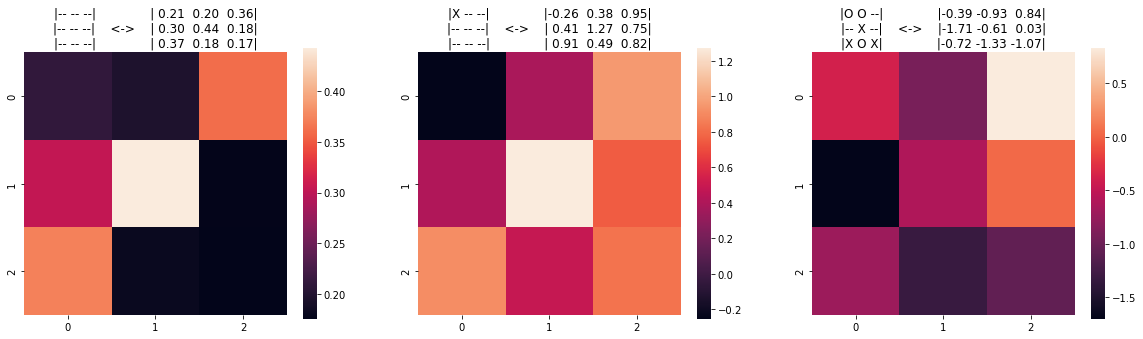

In [97]:
plot_grids_heatmap(policy_net, [grid1, grid2, grid3])

In [134]:
a[mask, :] =  branch_a
